**General facts about linear regression**
1. easy to understand
2. serve as a foundation for the understanding of other algorithums.
3. A type of supervised ML algorithums (regression which means output is numerical)

**Types of linear regression**

1. simple LR (only one input and one output data is present)
2. multiple ( more than one input data columns are present)
3. polynomial ( when the data present donot follow the linear pattern)

# 1. **Simple LR**

- Example ( cgpa and salary package)

- real world data problem can never be absolutely linear because of **stochastic error**.(having a random probability distribution or pattern that may be analysed statistically but may not be predicted precisely.)

- in real world we have **sor of linear data**. Here we have to develop the **best fit line** for this sort of linear data.(A line of best fit is a straight line that minimizes the distance between it and some data.)




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/9. Alex/Statistics/Inferential statistics/Correlation and regression analysis/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

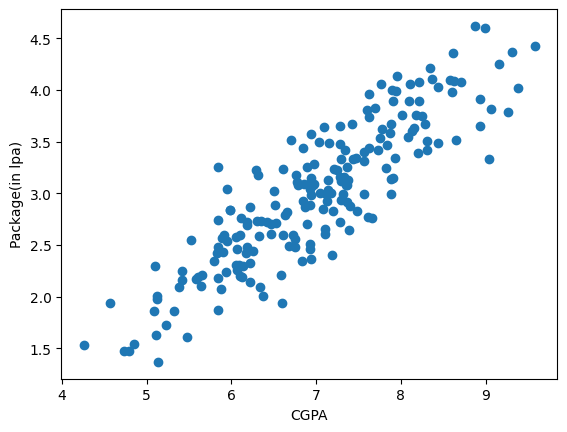

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

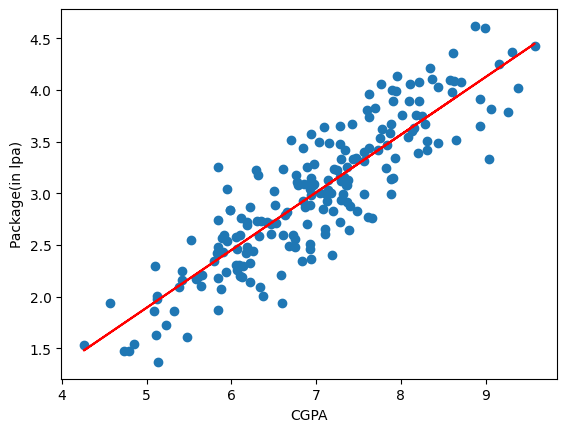

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [22]:
m = lr.coef_
b = lr.intercept_
# y = mx + b
m * 9 + b

array([4.12545584])

In [16]:
print(m)
print(b)

[0.55795197]
-0.8961119222429144


In [18]:
# prediction for other than data points present
m * 9.5 + b

array([4.40443183])

In [ ]:
m * 100 + b

array([54.89908542])

**BTS of linear regression**

The linear regression algorithum works by finding the best fit line which is predicted by the estimation of **m and b values** in such a way that the minimum possible error produced. in more practical way we can say that the line will the passed through every single point as near as possible.




---



---


---



---



---



**Building our own simple LR**

In [23]:
class MYLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        print(X_test)

        return self.m * X_test + self.b

In [25]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/9. Alex/Statistics/Inferential statistics/Correlation and regression analysis/placement.csv')
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = MYLR()
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [ ]:
print(lr.predict(X_test[0]))

8.58
3.891116009744203


**It gives the same results as linear regression algorithum but it has some limitations that it works only for simple LR**




---



---


---



---



---



# **2. Multiple LR**

- When we have two or more inputs in our data and one dependent output column ( in numerical form )
- Same principles of linear regression will be applied if we considered one variable from multiple variables.
- Example includes cGPA,Gender,IQ level and output include salaray package.

In [ ]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

In [ ]:
# make regreesion is a function in sklearn which is useful in generating regression problem.
# n_sample=rows, n_features=input columns, n_targets=output columns
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [ ]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
df.shape

(100, 3)

In [ ]:
df.head()

,feature1,feature2,target
0,0.651223,0.264221,69.292122
1,1.250752,0.063749,-65.742657
2,-2.329757,1.418946,2.719422
3,0.084032,2.144882,280.609586
4,0.110292,-0.419334,-24.258995


In [ ]:
# plotly is a library where we can draw higher dimensional data
import plotly.express as px
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 42.332354124461546
MSE 2606.6232033215615
R2 score 0.6767104725972787


In [ ]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

z_final = lr.predict(final).reshape(10, 10)

z = z_final

In [ ]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.add_trace(go.Surface(x = x, y = y, z =z ))
fig.show()

In [ ]:
lr.coef_

array([44.1300134 , 98.21992355])

In [ ]:
lr.intercept_

-9.418481462597303



---



---



---



---



---



**MULTIPLE LR CODE FROM SCRATCH**

- **First we apply sklearn linear regression to calculate r2 score**

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
X.shape

(442, 10)

In [ ]:
y.shape

(442,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399338661568968

In [ ]:
# As there are 10 coefficients
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
reg.intercept_

151.88331005254167

**Making our own Linear Regression Class**

- It can be used for simple linear regression as well

In [ ]:
class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [ ]:
lr = MeraLR()
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.43993386615689634

In [ ]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
lr.intercept_

151.88331005254165



---



---



---



---



---



# Polynomial linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline



---



**generate simple polynomial regression data(2D)**



---



In [ ]:
# y = 0.8x^2 + 0.9x + 2 (equation used)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

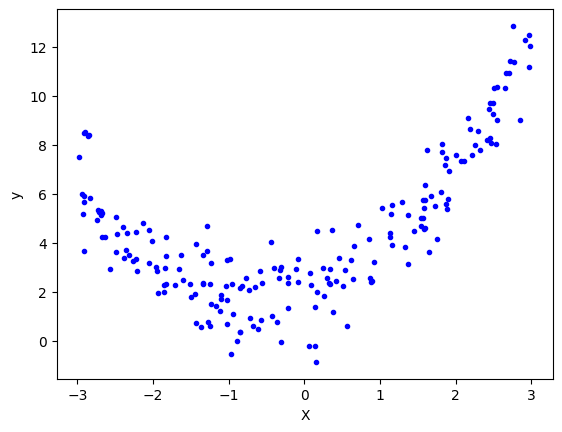

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()



---



**To apply simple LR on polynomial data set**



---



In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)
# r2 value is very low which clearly depicts the failure of simple LR on polynomial data set

0.2729618585828275

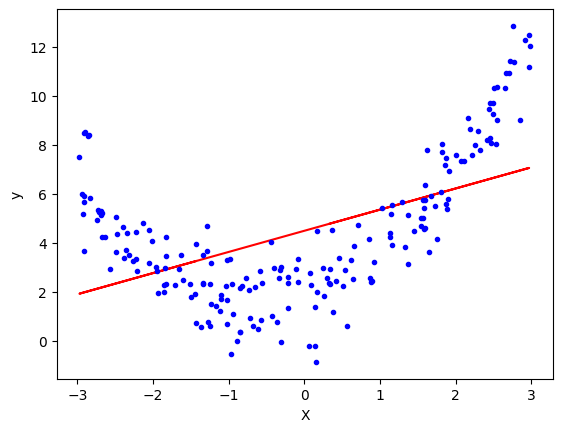

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()



---



**To apply polynomial LR**



---



In [ ]:
# include bias if false then (x power 0)term will be removed
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
# As degree value is 2 thus each x value is changed into 3 values(1 col = 3 col)
print(X_train[0])
print(X_train_trans[0])

[0.33785183]
[1.         0.33785183 0.11414386]


In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
# r2 score significantally increased
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8640331432369086

In [ ]:
# these values are closed to our original equation values but not exactly equal
# because of the the random noise
print(lr.coef_)
print(lr.intercept_)

[[0.         0.94827826 0.81140546]]
[1.95946]


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

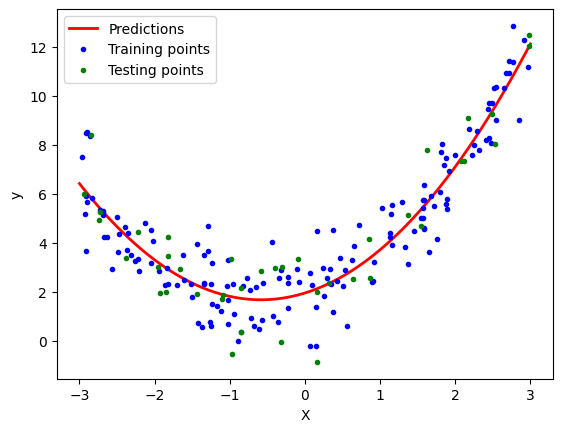

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

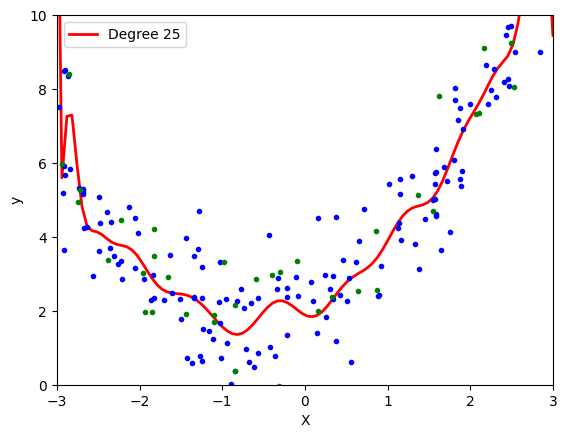

In [ ]:
polynomial_regression(25)
# if degree becomes significantly higher then it becomes overfitting case
# means the algorithum tries to over rely on training dataset rather test dataset
# so if new input will be provided then its output will not be according to the actual output



---



**generate multiple polynomial regression data(3D)**

In [ ]:
# 3D polynomial regression (x and y are input while y is output)
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

**By simple regression**

In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()



---



**By applying multiple polynomial linear regression**

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: ignored

In [ ]:
X_multi_trans.shape

(100, 496)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()